In [45]:
import torch

In [56]:
expl_method = "GradCAM"
# expl_method = 'LayerXAct'
# expl_method = 'LayerDL'
# transform = False
# transform = True
transform = ['spatial'] 
# transform = ['spatial', 'noise', 'color']
# transform = None
tester = "ConfAOPC"
# tester = "OrigAOPC"
seed = 0
mode = "insertion"

In [57]:
total_results = []

for i in range(0, 1, 1):
    log_name = f"./aopc_results/{tester}_transform_{transform}_mode_{mode}_expl_method_{expl_method}_seed_{seed}_batch_num_{i}.pt"
    print(log_name)
    try:
        log = torch.load(log_name)
        total_results.append(log)
    except:
        continue

print(total_results)
total_results = torch.stack(total_results)

./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_GradCAM_seed_0_batch_num_0.pt
[tensor([[0.0012, 0.0040, 0.0054, 0.0092, 0.0161, 0.0284, 0.0305, 0.0386, 0.0605,
         0.0762, 0.0890, 0.1029, 0.1061, 0.1284, 0.1505, 0.1702, 0.1963, 0.2121,
         0.2341, 0.2520, 0.2625],
        [0.0012, 0.0024, 0.0093, 0.0125, 0.0151, 0.0220, 0.0353, 0.0433, 0.0676,
         0.0765, 0.0898, 0.1139, 0.1218, 0.1327, 0.1495, 0.1749, 0.1981, 0.2066,
         0.2100, 0.2193, 0.2294]])]


In [58]:
total_results = total_results.mean(0)

In [59]:
total_results

tensor([[0.0012, 0.0040, 0.0054, 0.0092, 0.0161, 0.0284, 0.0305, 0.0386, 0.0605,
         0.0762, 0.0890, 0.1029, 0.1061, 0.1284, 0.1505, 0.1702, 0.1963, 0.2121,
         0.2341, 0.2520, 0.2625],
        [0.0012, 0.0024, 0.0093, 0.0125, 0.0151, 0.0220, 0.0353, 0.0433, 0.0676,
         0.0765, 0.0898, 0.1139, 0.1218, 0.1327, 0.1495, 0.1749, 0.1981, 0.2066,
         0.2100, 0.2193, 0.2294]])

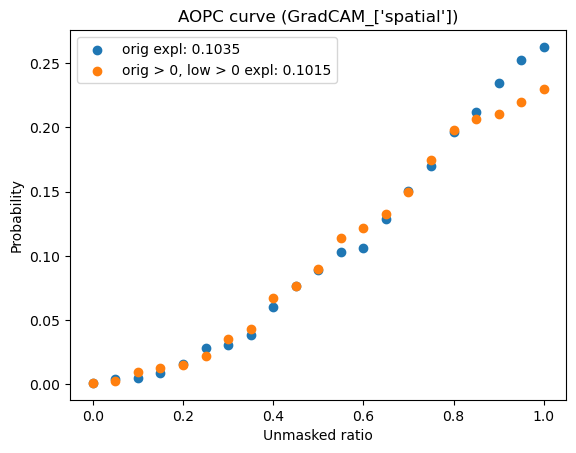

tensor(0.1035) tensor(0.1015)


In [60]:
import matplotlib.pyplot as plt
import numpy as np

if tester == "OrigAOPC":
    plt.scatter(np.arange(0, 1, 0.05), total_results[0], label = f"orig expl: {total_results[0].mean():.4f}")
    plt.scatter(np.arange(0, 1, 0.05), total_results[1], label = f"conf_high expl: {total_results[1].mean():.4f}")
    plt.scatter(np.arange(0, 1, 0.05), total_results[2], label = f"conf_low expl: {total_results[2].mean():.4f}")
elif tester == "ConfAOPC":
    plt.scatter(np.arange(0, 1.05, 0.05), total_results[0], label = f"orig expl: {total_results[0].mean():.4f}")
    plt.scatter(np.arange(0, 1.05, 0.05), total_results[1], label = f"orig > 0, low > 0 expl: {total_results[1].mean():.4f}")
    
plt.legend()
plt.title(f"AOPC curve ({expl_method}_{transform})")
plt.xlabel("Unmasked ratio")
plt.ylabel("Probability")

plt.show()

print(total_results[0].mean(), total_results[1].mean())

